In [2]:
from google.colab import files
uploaded = files.upload()


Saving brain_tumor_mini.zip to brain_tumor_mini.zip


In [3]:
import zipfile

with zipfile.ZipFile("brain_tumor_mini.zip", 'r') as zip_ref:
    zip_ref.extractall("brain_tumor_mini")


In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train = datagen.flow_from_directory(
    "brain_tumor_mini",
    target_size=(150, 150),
    batch_size=4,
    class_mode='binary',
    subset='training'
)

val = datagen.flow_from_directory(
    "brain_tumor_mini",
    target_size=(150, 150),
    batch_size=4,
    class_mode='binary',
    subset='validation'
)


Found 8 images belonging to 2 classes.
Found 2 images belonging to 2 classes.


In [5]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras import Input

base_model = VGG16(include_top=False, input_shape=(150, 150, 3), weights='imagenet')
base_model.trainable = False

model = Sequential([
    base_model,
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 4, 4, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       524,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,239,105 (58.13 MB)

 Trainable params: 524,417 (2.00 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [12]:
history=model.fit(train, validation_data=val, epochs=5)


Epoch 1/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.5000 - loss: 0.7206 - val_accuracy: 0.5000 - val_loss: 0.6936
Epoch 2/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step - accuracy: 0.4167 - loss: 0.7253 - val_accuracy: 0.5000 - val_loss: 0.7251
Epoch 3/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 1s/step - accuracy: 0.5000 - loss: 0.7279 - val_accuracy: 0.5000 - val_loss: 0.7394
Epoch 4/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 1s/step - accuracy: 0.5000 - loss: 0.7394 - val_accuracy: 0.5000 - val_loss: 0.7241
Epoch 5/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 1s/step - accuracy: 0.5000 - loss: 0.7179 - val_accuracy: 0.5000 - val_loss: 0.7010


In [13]:
from google.colab import files
uploaded = files.upload()


Saving yes_1.jpg to yes_1 (1).jpg


In [14]:
import cv2
import numpy as np

img = cv2.imread('yes_1.jpg')
img = cv2.resize(img, (150, 150))
img = img / 255.0
img = np.expand_dims(img, axis=0)

prediction = model.predict(img)[0][0]

print("🧠 Prediction:", "Tumor Detected" if prediction > 0.5 else "No Tumor")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 434ms/step
🧠 Prediction: Tumor Detected


In [15]:
model.save("brain_tumor_vgg16.h5")


In [16]:
from google.colab import files
files.download("brain_tumor_vgg16.h5")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

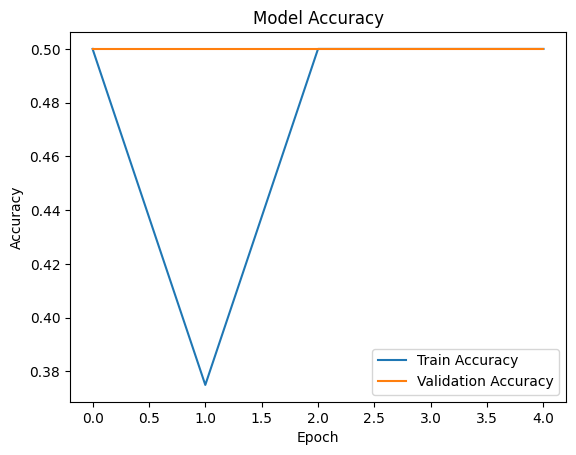

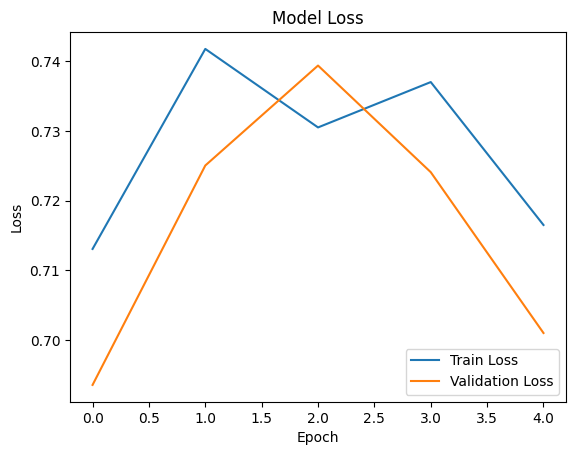

In [17]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()
